# student grade predictor using habits


In [2]:
import numpy as np 
import pandas as pd
df=pd.read_csv("C:\\Users\\rudhr\\Downloads\\student_habits_performance.csv")
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [3]:
df.notnull().sum()

student_id                       1000
age                              1000
gender                           1000
study_hours_per_day              1000
social_media_hours               1000
netflix_hours                    1000
part_time_job                    1000
attendance_percentage            1000
sleep_hours                      1000
diet_quality                     1000
exercise_frequency               1000
parental_education_level          909
internet_quality                 1000
mental_health_rating             1000
extracurricular_participation    1000
exam_score                       1000
dtype: int64

In [4]:
df[df['parental_education_level'].isnull()]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,S1010,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,S1033,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,S1047,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,S1074,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,S1093,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,S1921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,S1925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,S1939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


In [5]:
df['parental_education_level']=df['parental_education_level'].fillna('Unknown')

In [6]:
df.set_index('student_id')

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4


In [7]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [8]:
features=['gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation']
target=['exam_score']

In [9]:
# X = all feature columns
x = df[features]

# y = target column ie what i want to predict 
y = df['exam_score']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=5)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cat_features=['gender','part_time_job','diet_quality','parental_education_level','internet_quality','extracurricular_participation']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)],
    remainder='passthrough'  )
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(x_train, y_train)

# Predict and evaluate
preds = model.predict(x_test)
print("R² score:", r2_score(y_test, preds))
print("MSE     :", mean_squared_error(y_test, preds))

R² score: 0.9027515114072535
MSE     : 28.552855832145184


In [12]:
import joblib

# Save model
joblib.dump(Pipeline, 'student_model.pkl')


['student_model.pkl']

In [13]:
#check for residuals
residuals=y_test-preds
residuals

544     1.487079
515     4.742871
193    -0.594809
11     11.566805
279     3.366416
         ...    
860    -3.701130
379    -2.245406
896    -1.101577
809    11.764573
165    -0.459109
Name: exam_score, Length: 200, dtype: float64

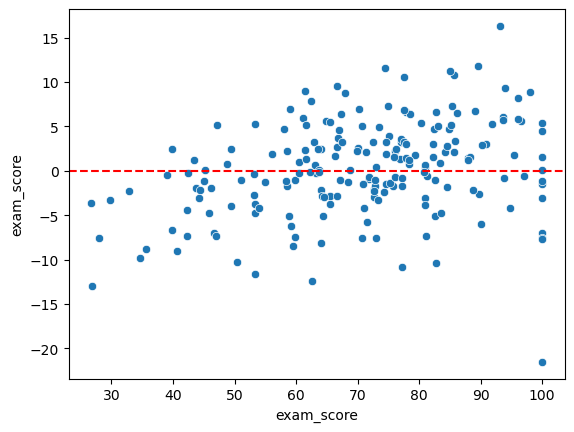

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df,x=y_test,y=residuals)
plt.axhline(y=0,color='red',ls='--')#as we can see the plot doesnt make a noticable curve so linear regression might be suitable for the data

In [15]:
# Final training with best model
best_model = LinearRegression()
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model)
])

pipe.fit(x_train, y_train)

# Save the trained pipeline
import joblib
joblib.dump(pipe, "student_model.pkl")

['student_model.pkl']